In [1]:
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt


2024-12-12 16:35:15.104567: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 16:35:15.104934: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 16:35:15.108447: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 16:35:15.117539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734017715.135276  804627 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734017715.13

In [2]:


# Load data
max_features = 10000
max_review_length = 500
data = keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=max_features,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
)


(x_train, y_train), (x_test, y_test) = data
# Pad sequences
x_train_padded = pad_sequences(x_train, maxlen=max_review_length)
x_test_padded = pad_sequences(x_test, maxlen=max_review_length)

# Data is ready for use in a model
print(x_train_padded.shape, x_test_padded.shape)


(25000, 500) (25000, 500)


In [3]:
def create_model(max_len, rnn_type="RNN", rnn_units=32):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
    if rnn_type == "RNN":
        model.add(SimpleRNN(rnn_units))
    elif rnn_type == "LSTM":
        model.add(LSTM(rnn_units))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


In [4]:

# 3. Train and evaluate models with different configurations
configurations = [
    {"rnn_type": "RNN", "rnn_units": 32},
    {"rnn_type": "RNN", "rnn_units": 64},
    {"rnn_type": "LSTM", "rnn_units": 32},
    {"rnn_type": "LSTM", "rnn_units": 64},
]


In [5]:
history_results = {}

print(type(x_train))

for config in configurations:
    print(f"Training model: {config}")
    model = create_model(max_review_length,
        rnn_type=config["rnn_type"], rnn_units=config["rnn_units"]
    )
    print("created model")
    history = model.fit(
        x=x_train_padded,
        y=y_train,
        epochs=15,
        batch_size=128,
        validation_data=(x_test_padded, y_test),
        verbose=1,
    )
    history_results[f'{config["rnn_type"]}_{config["rnn_units"]}'] = history


<class 'numpy.ndarray'>
Training model: {'rnn_type': 'RNN', 'rnn_units': 32}
created model
Epoch 1/15


/home/matip/projects/studia/s7/sieci-neuronowe/cw7/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-12-12 16:35:19.627356: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - accuracy: 0.6775 - loss: 0.5755 - val_accuracy: 0.6992 - val_loss: 0.5683
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 124ms/step - accuracy: 0.8125 - loss: 0.4193 - val_accuracy: 0.8308 - val_loss: 0.4036
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.9078 - loss: 0.2432 - val_accuracy: 0.8192 - val_loss: 0.4323
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.9576 - loss: 0.1301 - val_accuracy: 0.8459 - val_loss: 0.4245
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.9849 - loss: 0.0551 - val_accuracy: 0.8322 - val_loss: 0.5050
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.9940 - loss: 0.0286 - val_accuracy: 0.8358 - val_loss: 0.5627
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.9975 - loss: 0.0136 - val_accuracy: 0.8404 - val_loss: 0.5937
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.9977 - loss: 0.0108 - val

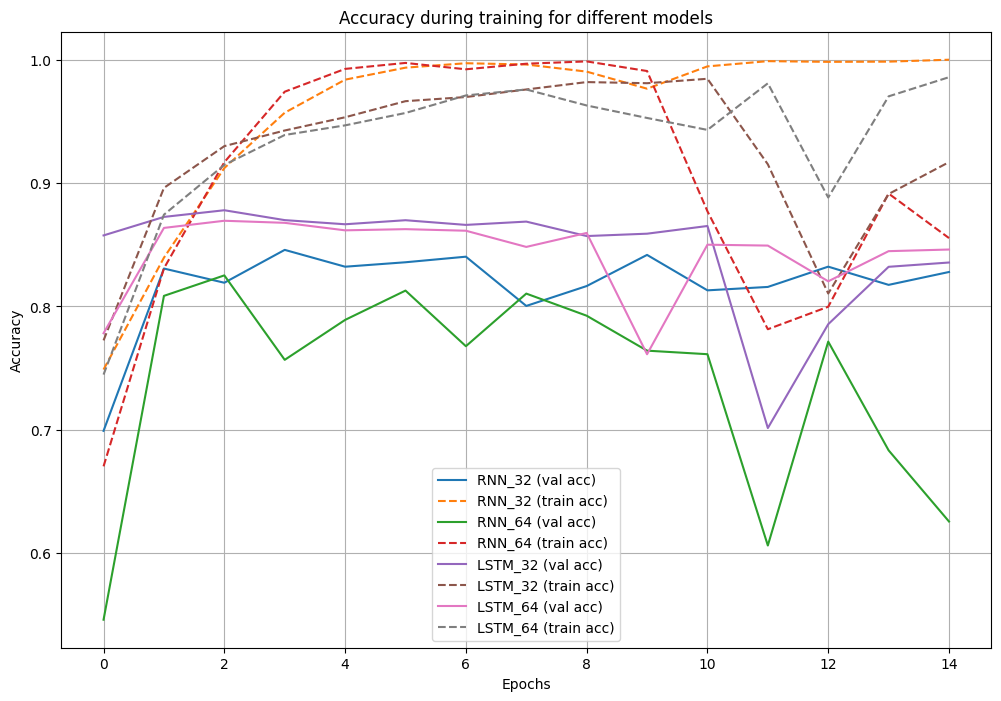

In [6]:
plt.figure(figsize=(12, 8))
for key, history in history_results.items():
    plt.plot(history.history["val_accuracy"], label=f"{key} (val acc)")
    plt.plot(history.history["accuracy"], linestyle="--", label=f"{key} (train acc)")

plt.title("Accuracy during training for different models")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


# Wpływ przycięcia długości recenzji

In [7]:
max_review_length = 20
data_short = keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=max_features,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
)


(x_train_short, y_train_short), (x_test_short, y_test_short) = data_short
# Pad sequences
x_train_short_padded = pad_sequences(x_train_short, maxlen=max_review_length)
x_test_short_padded = pad_sequences(x_test_short, maxlen=max_review_length)

In [8]:
history_results_short = {}

print(type(x_train))

for config in configurations:
    print(f"Training model: {config}")
    model = create_model(max_review_length,
                         rnn_type=config["rnn_type"], rnn_units=config["rnn_units"]
                         )
    print("created model")
    history = model.fit(
        x=x_train_short_padded,
        y=y_train_short,
        epochs=15,
        batch_size=128,
        validation_data=(x_test_padded, y_test),
        verbose=1,
    )
    history_results_short[f'{config["rnn_type"]}_{config["rnn_units"]}'] = history



<class 'numpy.ndarray'>
Training model: {'rnn_type': 'RNN', 'rnn_units': 32}
created model
Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6095 - loss: 0.6362 - val_accuracy: 0.8107 - val_loss: 0.4197
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8428 - loss: 0.3631 - val_accuracy: 0.7882 - val_loss: 0.4637
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9404 - loss: 0.1745 - val_accuracy: 0.7733 - val_loss: 0.5980
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9850 - loss: 0.0625 - val_accuracy: 0.7496 - val_loss: 0.7572
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9962 - loss: 0.0216 - val_accuracy: 0.7376 - val_loss: 0.8839
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9994 - loss: 0.0077 - val_accuracy: 0.7321 - val_loss: 0.9868
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9999 - loss: 0.0029 - val_accuracy: 0.7630 - val_loss: 0.9708
Epoch 

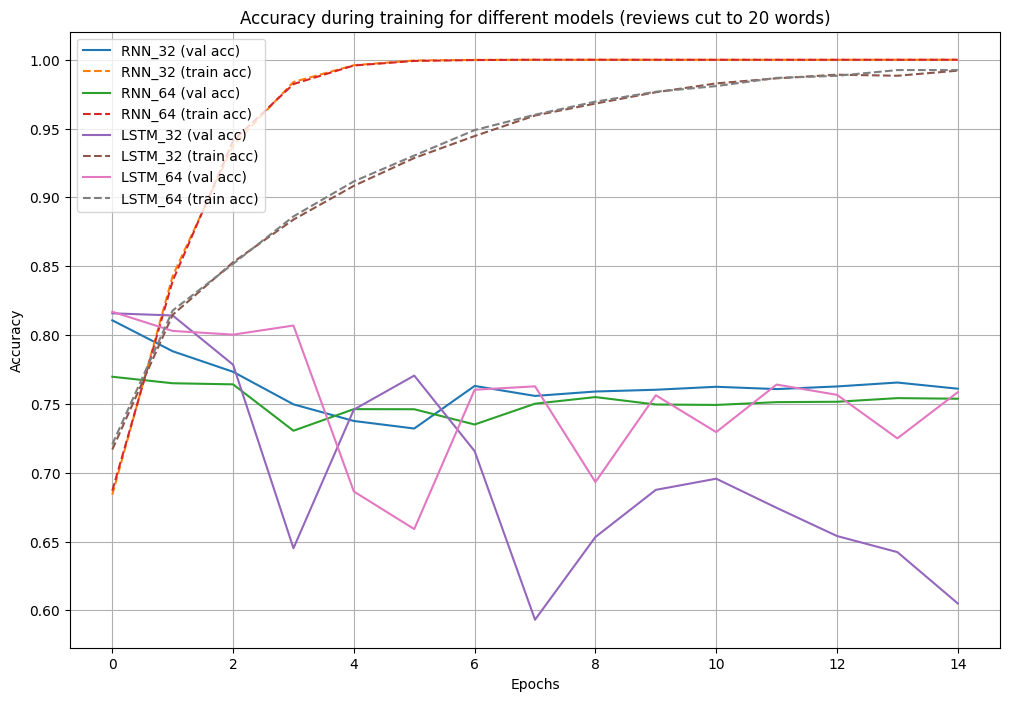

In [9]:
plt.figure(figsize=(12, 8))
for key, history in history_results_short.items():
    plt.plot(history.history["val_accuracy"], label=f"{key} (val acc)")
    plt.plot(history.history["accuracy"], linestyle="--", label=f"{key} (train acc)")

plt.title("Accuracy during training for different models (reviews cut to 20 words)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


# Wnioski


## RNN vs. LSTM:
LSTMy osiągają lepszą dokładność walidacyjną i są stabilniejsze niż RNNy, które szybko przeuczają się i mają niestabilne wyniki walidacyjne.

## Długość recenzji:
Dłuższe recenzje (500 słów) pozwalają modelom osiągać wyższą dokładność walidacyjną dzięki większej ilości danych do analizy.
Krótsze recenzje (20 słów) utrudniają uogólnianie i skutkują niższą oraz bardziej zmienną dokładnością walidacyjną.

## Pojemność modeli (32 vs. 64 jednostki):
Modele o większej pojemności (64) lepiej radzą sobie z walidacją, ale są bardziej narażone na przeuczenie, szczególnie w przypadku RNNów.